## Step 1: Setup and Imports

We begin by setting the working directory and importing the custom processing functions defined in `SignalProcessingScripts.py`.

We also reload the module to ensure any changes to the code are reflected without restarting the kernel.

The `context` dictionary is used to store and pass data between steps.

In [1]:
%cd "/home/ammir/Desktop/Golem Seismic Processing/src/"
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # for more resolution plots

# Center the plot
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

import golem as gisis

context = {}

/home/ammir/Desktop/Golem Seismic Processing/src


/home/ammir/anaconda3/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


## 2. Read Binary Header
    First we will read the binary header of the segy file.

In [2]:
context['binary_header'] = gisis.get_binary_header(context, file_path='/home/ammir/Desktop/Seismic Dataset/BP Benchmark 2004/ShotGather/shots0001_0200.segy')
context['binary_header']

{JobID: 0, LineNumber: 0, ReelNumber: 1, Traces: 1201, AuxTraces: 0, Interval: 6000, IntervalOriginal: 0, Samples: 2001, SamplesOriginal: 0, Format: 1, EnsembleFold: 0, SortingCode: 0, VerticalSum: 0, SweepFrequencyStart: 0, SweepFrequencyEnd: 0, SweepLength: 0, Sweep: 0, SweepChannel: 0, SweepTaperStart: 0, SweepTaperEnd: 0, Taper: 0, CorrelatedTraces: 0, BinaryGainRecovery: 0, AmplitudeRecovery: 0, MeasurementSystem: 2, ImpulseSignalPolarity: 0, VibratoryPolarity: 0, ExtAuxTraces: 0, ExtSamples: 0, ExtSamplesOriginal: 0, ExtEnsembleFold: 0, SEGYRevision: 0, SEGYRevisionMinor: 0, TraceFlag: 1, ExtendedHeaders: 0}

## 3. Read Text Header
    Then we obtain the text header to see informations about the geometry or past processing.

In [3]:
context['text_header'] = gisis.get_text_header(context, file_path='/home/ammir/Desktop/Seismic Dataset/BP Benchmark 2004/ShotGather/shots0001_0200.segy')
context['text_header']

{'C01': '1  shots0001_0200.segy',
 'C02': '2  Input data: shoth 1 to 200',
 'C03': '3  axis   t     x    shot',
 'C04': '4  size   2001  1201 200',
 'C05': '5  origin 0     0    1',
 'C06': '6  delta  0.006 12.5 1',
 'C07': '7  unit   sec   m    number',
 'C08': '8  First trace(1) of each shot is max offset (x = xshot - 15km)',
 'C09': '9  Last trace(1201) of each shot is zero offset (x = xshot - 0)',
 'C10': '10 Shot interval is 50m | XYScaler=-10 | ElevScaler=-10',
 'C11': '11',
 'C12': '12 BP 2004 Velocity Benchmark',
 'C13': '13',
 'C14': '14 Read full disclaimer provided with the data.',
 'C15': '15',
 'C16': '16 You accept the material as is and assume all responsability',
 'C17': '17 for the results or use of the material. Any use which you',
 'C18': '18 make of the materials is at your own risks.',
 'C19': '19',
 'C20': '20 BP provides no warranties to you, expressed, implied or statutory,',
 'C21': '21 including any implied warranties of fitness for a particular purpose.',
 'C

## 4. Read Trace Data
    Here we extract the trace data, which contains the seismogram in a 2D numpy array with dimensions (timesamples, ntraces)

In [4]:
context['data'] = gisis.get_trace_data(context, file_path='/home/ammir/Desktop/Seismic Dataset/BP Benchmark 2004/ShotGather/shots0001_0200.segy', ignore_geometry=True)

## 5. Read Trace Header (trace geometry)
    Here we extract the trace header, which contains the geometry information about the segy file

In [5]:
context['geometry'] = gisis.get_trace_header(context, file_path='/home/ammir/Desktop/Seismic Dataset/BP Benchmark 2004/ShotGather/shots0001_0200.segy',ignore_geometry=True)
context['geometry'].head(10)

TRACE_SEQUENCE_LINE  TRACE_SEQUENCE_FILE  FieldRecord  TraceNumber  \
0                    1                    1            1            1   
1                    2                    2            1            2   
2                    3                    3            1            3   
3                    4                    4            1            4   
4                    5                    5            1            5   
5                    6                    6            1            6   
6                    7                    7            1            7   
7                    8                    8            1            8   
8                    9                    9            1            9   
9                   10                   10            1           10   

   EnergySourcePoint  CDP  CDP_TRACE  TraceIdentificationCode  NSummedTraces  \
0                  0    0          1                        1              0   
1                  0    0          2                        1              0   
2                  0    0          3                        1              0   
3                  0    0          4                        1              0   
4                  0    0          5                        1              0   
5                  0    0          6                        1              0   
6                  0    0          7                        1              0   
7                  0    0          8                        1              0   
8                  0    0          9                        1              0   
9                  0    0         10                        1              0   

   NStackedTraces  ...  TraceIdentifier  ScalarTraceHeader  SourceType  \
0               0  ...                0                  0           0   
1               0  ...                0                  0           0   
2               0  ...                0                  0           0   
3               0  ...                0                  0           0   
4               0  ...                0                  0           0   
5               0  ...                0                  0           0   
6               0  ...                0                  0           0   
7               0  ...                0                  0           0   
8               0  ...                0                  0           0   
9               0  ...                0                  0           0   

   SourceEnergyDirectionMantissa  SourceEnergyDirectionExponent  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   
5                              0                              0   
6                              0                              0   
7                              0                              0   
8                              0                              0   
9                              0                              0   

   SourceMeasurementMantissa  SourceMeasurementExponent  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   
5                          0                          0   
6                          0                          0   
7                          0                          0   
8                          0                          0   
9                          0                          0   

   SourceMeasurementUnit  UnassignedInt1  UnassignedInt2  
0                      0               0               0

## 6. Scale coordinate units
    Here we need to scale the coordinate units of the segy. This happens because the file can only store in integers, but X, Y and Z are in floats, so we need to apply a scaling factor to make it a float

In [6]:
context['geometry'] = gisis.scale_coordinate_units(context, key="geometry", XY_headers=['SourceX', 'SourceY', 'GroupX', 'GroupY'], elevation_headers=['SourceDepth', 'SourceSurfaceElevation'], XY_Scaler=10., elevation_scaler=10.)
context['geometry'].head(10)

TRACE_SEQUENCE_LINE  TRACE_SEQUENCE_FILE  FieldRecord  TraceNumber  \
0                    1                    1            1            1   
1                    2                    2            1            2   
2                    3                    3            1            3   
3                    4                    4            1            4   
4                    5                    5            1            5   
5                    6                    6            1            6   
6                    7                    7            1            7   
7                    8                    8            1            8   
8                    9                    9            1            9   
9                   10                   10            1           10   

   EnergySourcePoint  CDP  CDP_TRACE  TraceIdentificationCode  NSummedTraces  \
0                  0    0          1                        1              0   
1                  0    0          2                        1              0   
2                  0    0          3                        1              0   
3                  0    0          4                        1              0   
4                  0    0          5                        1              0   
5                  0    0          6                        1              0   
6                  0    0          7                        1              0   
7                  0    0          8                        1              0   
8                  0    0          9                        1              0   
9                  0    0         10                        1              0   

   NStackedTraces  ...  TraceIdentifier  ScalarTraceHeader  SourceType  \
0               0  ...                0                  0           0   
1               0  ...                0                  0           0   
2               0  ...                0                  0           0   
3               0  ...                0                  0           0   
4               0  ...                0                  0           0   
5               0  ...                0                  0           0   
6               0  ...                0                  0           0   
7               0  ...                0                  0           0   
8               0  ...                0                  0           0   
9               0  ...                0                  0           0   

   SourceEnergyDirectionMantissa  SourceEnergyDirectionExponent  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   
5                              0                              0   
6                              0                              0   
7                              0                              0   
8                              0                              0   
9                              0                              0   

   SourceMeasurementMantissa  SourceMeasurementExponent  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   
5                          0                          0   
6                          0                          0   
7                          0                          0   
8                          0                          0   
9                          0                          0   

   SourceMeasurementUnit  UnassignedInt1  UnassignedInt2  
0                      0               0               0

## 7. Subset a specific shot for visualization
    Let's subset the data into the shot number 180 just to see its contents

In [7]:
gisis.subset_geometry_by_condition(context, condition="FieldRecord == 180", key_input="data", key_output="subset_data", key_geometry_input="geometry", key_geometry_output="subset_geometry")

TRACE_SEQUENCE_LINE  TRACE_SEQUENCE_FILE  FieldRecord  TraceNumber  \
214979               214980               214980          180            1   
214980               214981               214981          180            2   
214981               214982               214982          180            3   
214982               214983               214983          180            4   
214983               214984               214984          180            5   
...                     ...                  ...          ...          ...   
216175               216176               216176          180         1197   
216176               216177               216177          180         1198   
216177               216178               216178          180         1199   
216178               216179               216179          180         1200   
216179               216180               216180          180         1201   

        EnergySourcePoint  CDP  CDP_TRACE  TraceIdentificationCode  \
214979                  0    0          1                        1   
214980                  0    0          2                        1   
214981                  0    0          3                        1   
214982                  0    0          4                        1   
214983                  0    0          5                        1   
...                   ...  ...        ...                      ...   
216175                  0    0       1197                        1   
216176                  0    0       1198                        1   
216177                  0    0       1199                        1   
216178                  0    0       1200                        1   
216179                  0    0       1201                        1   

        NSummedTraces  NStackedTraces  ...  TraceIdentifier  \
214979              0               0  ...                0   
214980              0               0  ...                0   
214981              0               0  ...                0   
214982              0               0  ...                0   
214983              0               0  ...                0   
...               ...             ...  ...              ...   
216175              0               0  ...                0   
216176              0               0  ...                0   
216177              0               0  ...                0   
216178              0               0  ...                0   
216179              0               0  ...                0   

        ScalarTraceHeader  SourceType  SourceEnergyDirectionMantissa  \
214979                  0           0                              0   
214980                  0           0                              0   
214981                  0           0                              0   
214982                  0           0                              0   
214983                  0           0                              0   
...                   ...         ...                            ...   
216175                  0           0                              0   
216176                  0           0                              0   
216177                  0           0                              0   
216178                  0           0                              0   
216179                  0           0                              0   

        SourceEnergyDirectionExponent  SourceMeasurementMantissa  \
214979                              0                          0   
214980                              0                          0   
214981                              0                          0   
214982                              0                          0   
214983                              0                          0   
...                               ...                        ...   
216175                              0                          0   
216176                              0                          0

## 8. Visualize the data

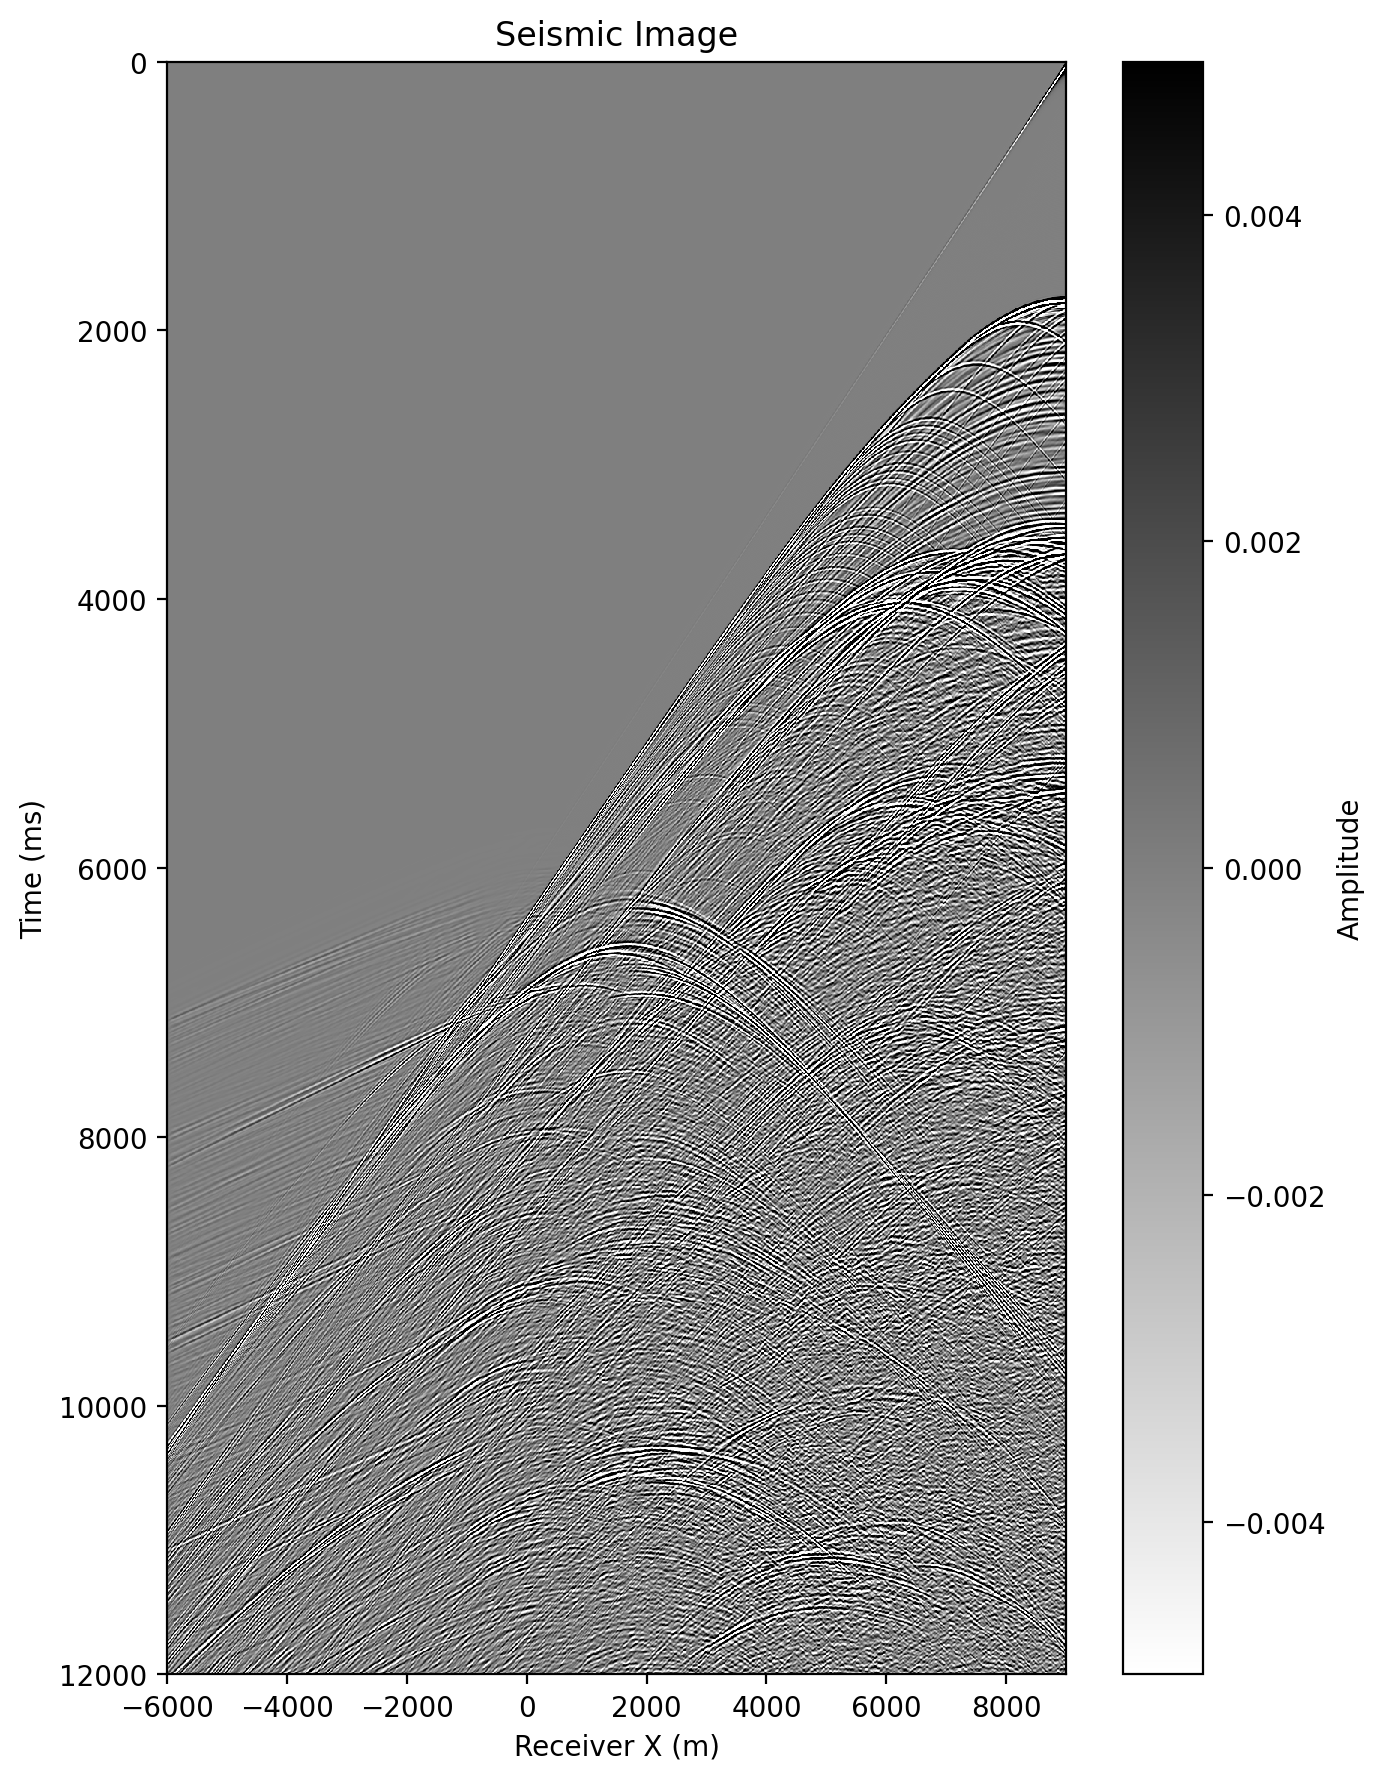

In [8]:
gisis.plot_seismic_image(context,
    xlabel="Receiver X (m)",
    ylabel="Time (ms)",
    y_spacing=6.0,
    x_header="GroupX",
    perc=95,
    key_data='subset_data',
    key_geometry='subset_geometry'
)

## 9. Plot the acquisition geometry


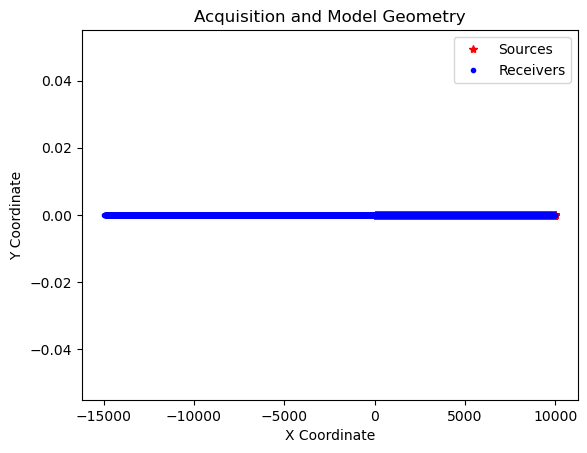

In [9]:
gisis.plot_acquisition(context, key_acquisition_geometry='geometry')

## 10. Read Velocity Model SEGY
    Now let's do the same for the velocity model

In [10]:
model_path = '/home/ammir/Desktop/Seismic Dataset/BP Benchmark 2004/Properties/vel_z6.25m_x12.5m_exact.segy'
context['model_text_header'] = gisis.get_text_header(context, file_path=model_path)
context['model_text_header']

{'C01': '1  vel_z6.25m_x12.5m_exact.segy',
 'C02': '2  Exact velocity model',
 'C03': '3  axis   z    x    y',
 'C04': '4  size   1911 5395 1',
 'C05': '5  origin 0    0    0',
 'C06': '6  delta  6.25 12.5 1',
 'C07': '7  unit   meter',
 'C08': '8',
 'C09': '9  XYScaler=-10',
 'C10': '10 ElevScaler=-10',
 'C11': '11',
 'C12': '12 BP 2004 Velocity Benchmark',
 'C13': '13',
 'C14': '14 Read full disclaimer provided with the data.',
 'C15': '15',
 'C16': '16 You accept the material as is and assume all responsability',
 'C17': '17 for the results or use of the material. Any use which you',
 'C18': '18 make of the materials is at your own risks.',
 'C19': '19',
 'C20': '20 BP provides no warranties to you, expressed, implied or statutory,',
 'C21': '21 including any implied warranties of fitness for a particular purpose.',
 'C22': '22',
 'C23': '23 You agree that if you share any or all of this data with any other',
 'C24': '24 person or organization, you will also include all of the assoc

## 11. Read Geometry 

In [11]:
context['model geometry'] = gisis.get_trace_header(context, file_path=model_path,ignore_geometry=True)
context['model geometry'].head(10)

TRACE_SEQUENCE_LINE  TRACE_SEQUENCE_FILE  FieldRecord  TraceNumber  \
0                    0                    0            1            1   
1                    0                    0            1            2   
2                    0                    0            1            3   
3                    0                    0            1            4   
4                    0                    0            1            5   
5                    0                    0            1            6   
6                    0                    0            1            7   
7                    0                    0            1            8   
8                    0                    0            1            9   
9                    0                    0            1           10   

   EnergySourcePoint  CDP  CDP_TRACE  TraceIdentificationCode  NSummedTraces  \
0                  0    1          1                        1              0   
1                  0    2          2                        1              0   
2                  0    3          3                        1              0   
3                  0    4          4                        1              0   
4                  0    5          5                        1              0   
5                  0    6          6                        1              0   
6                  0    7          7                        1              0   
7                  0    8          8                        1              0   
8                  0    9          9                        1              0   
9                  0   10         10                        1              0   

   NStackedTraces  ...  TraceIdentifier  ScalarTraceHeader  SourceType  \
0               0  ...                0                  0           0   
1               0  ...                0                  0           0   
2               0  ...                0                  0           0   
3               0  ...                0                  0           0   
4               0  ...                0                  0           0   
5               0  ...                0                  0           0   
6               0  ...                0                  0           0   
7               0  ...                0                  0           0   
8               0  ...                0                  0           0   
9               0  ...                0                  0           0   

   SourceEnergyDirectionMantissa  SourceEnergyDirectionExponent  \
0                          65536                              0   
1                          65536                              0   
2                          65536                              0   
3                          65536                              0   
4                          65536                              0   
5                          65536                              0   
6                          65536                              0   
7                          65536                              0   
8                          65536                              0   
9                          65536                              0   

   SourceMeasurementMantissa  SourceMeasurementExponent  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   
5                          0                          0   
6                          0                          0   
7                          0                          0   
8                          0                          0   
9                          0                          0   

   SourceMeasurementUnit  UnassignedInt1  UnassignedInt2  
0                      0               0               0

## 11. Scale Coordinate Units

In [12]:
context['model geometry'] = gisis.scale_coordinate_units(context, key="model geometry", XY_headers=['SourceX', 'SourceY', 'GroupX', 'GroupY'], elevation_headers=['SourceDepth', 'SourceSurfaceElevation'], XY_Scaler=10., elevation_scaler=10.)
context['model geometry'].head(10)

TRACE_SEQUENCE_LINE  TRACE_SEQUENCE_FILE  FieldRecord  TraceNumber  \
0                    0                    0            1            1   
1                    0                    0            1            2   
2                    0                    0            1            3   
3                    0                    0            1            4   
4                    0                    0            1            5   
5                    0                    0            1            6   
6                    0                    0            1            7   
7                    0                    0            1            8   
8                    0                    0            1            9   
9                    0                    0            1           10   

   EnergySourcePoint  CDP  CDP_TRACE  TraceIdentificationCode  NSummedTraces  \
0                  0    1          1                        1              0   
1                  0    2          2                        1              0   
2                  0    3          3                        1              0   
3                  0    4          4                        1              0   
4                  0    5          5                        1              0   
5                  0    6          6                        1              0   
6                  0    7          7                        1              0   
7                  0    8          8                        1              0   
8                  0    9          9                        1              0   
9                  0   10         10                        1              0   

   NStackedTraces  ...  TraceIdentifier  ScalarTraceHeader  SourceType  \
0               0  ...                0                  0           0   
1               0  ...                0                  0           0   
2               0  ...                0                  0           0   
3               0  ...                0                  0           0   
4               0  ...                0                  0           0   
5               0  ...                0                  0           0   
6               0  ...                0                  0           0   
7               0  ...                0                  0           0   
8               0  ...                0                  0           0   
9               0  ...                0                  0           0   

   SourceEnergyDirectionMantissa  SourceEnergyDirectionExponent  \
0                          65536                              0   
1                          65536                              0   
2                          65536                              0   
3                          65536                              0   
4                          65536                              0   
5                          65536                              0   
6                          65536                              0   
7                          65536                              0   
8                          65536                              0   
9                          65536                              0   

   SourceMeasurementMantissa  SourceMeasurementExponent  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   
5                          0                          0   
6                          0                          0   
7                          0                          0   
8                          0                          0   
9                          0                          0   

   SourceMeasurementUnit  UnassignedInt1  UnassignedInt2  
0                      0               0               0

## 12. Read Velocity Model Contents

In [13]:
context['model'] = gisis.get_trace_data(context, file_path=model_path, ignore_geometry=True)

## 13. Show Contents

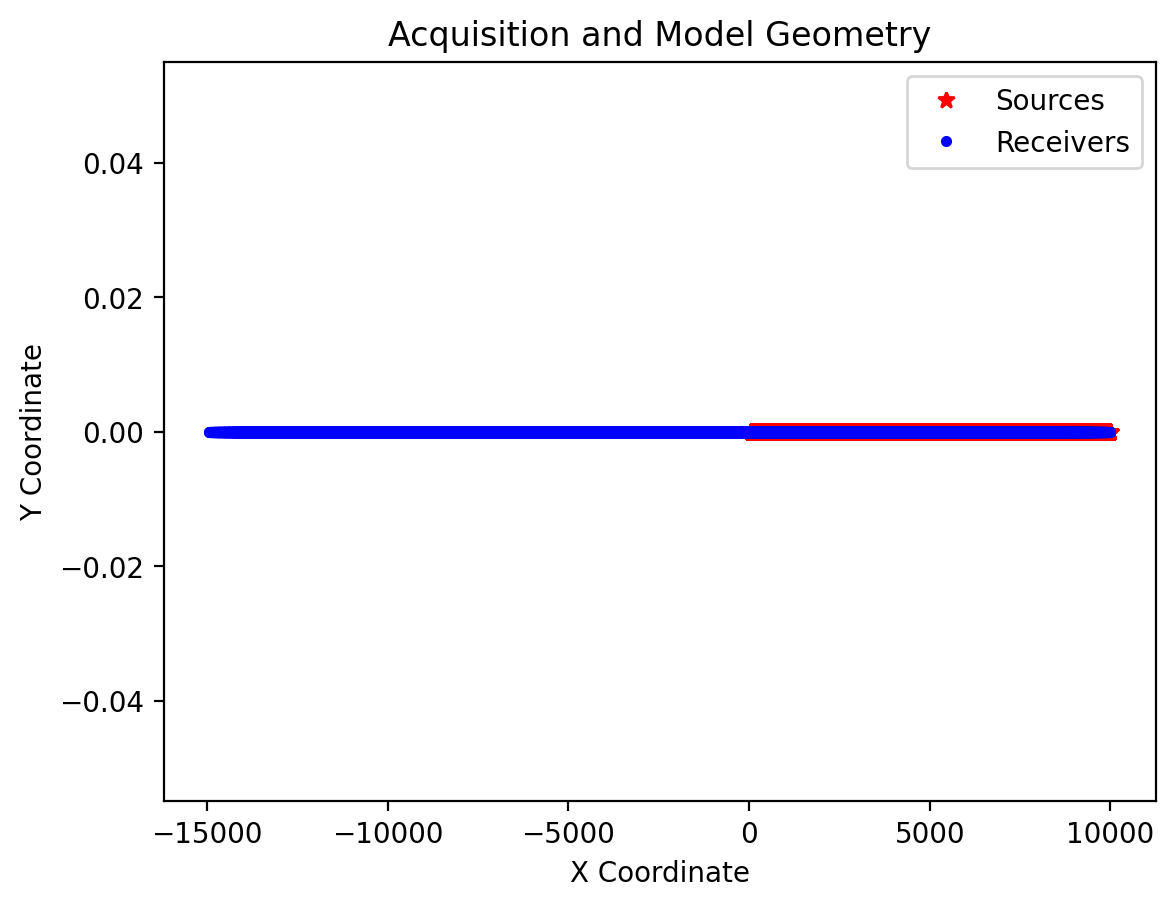

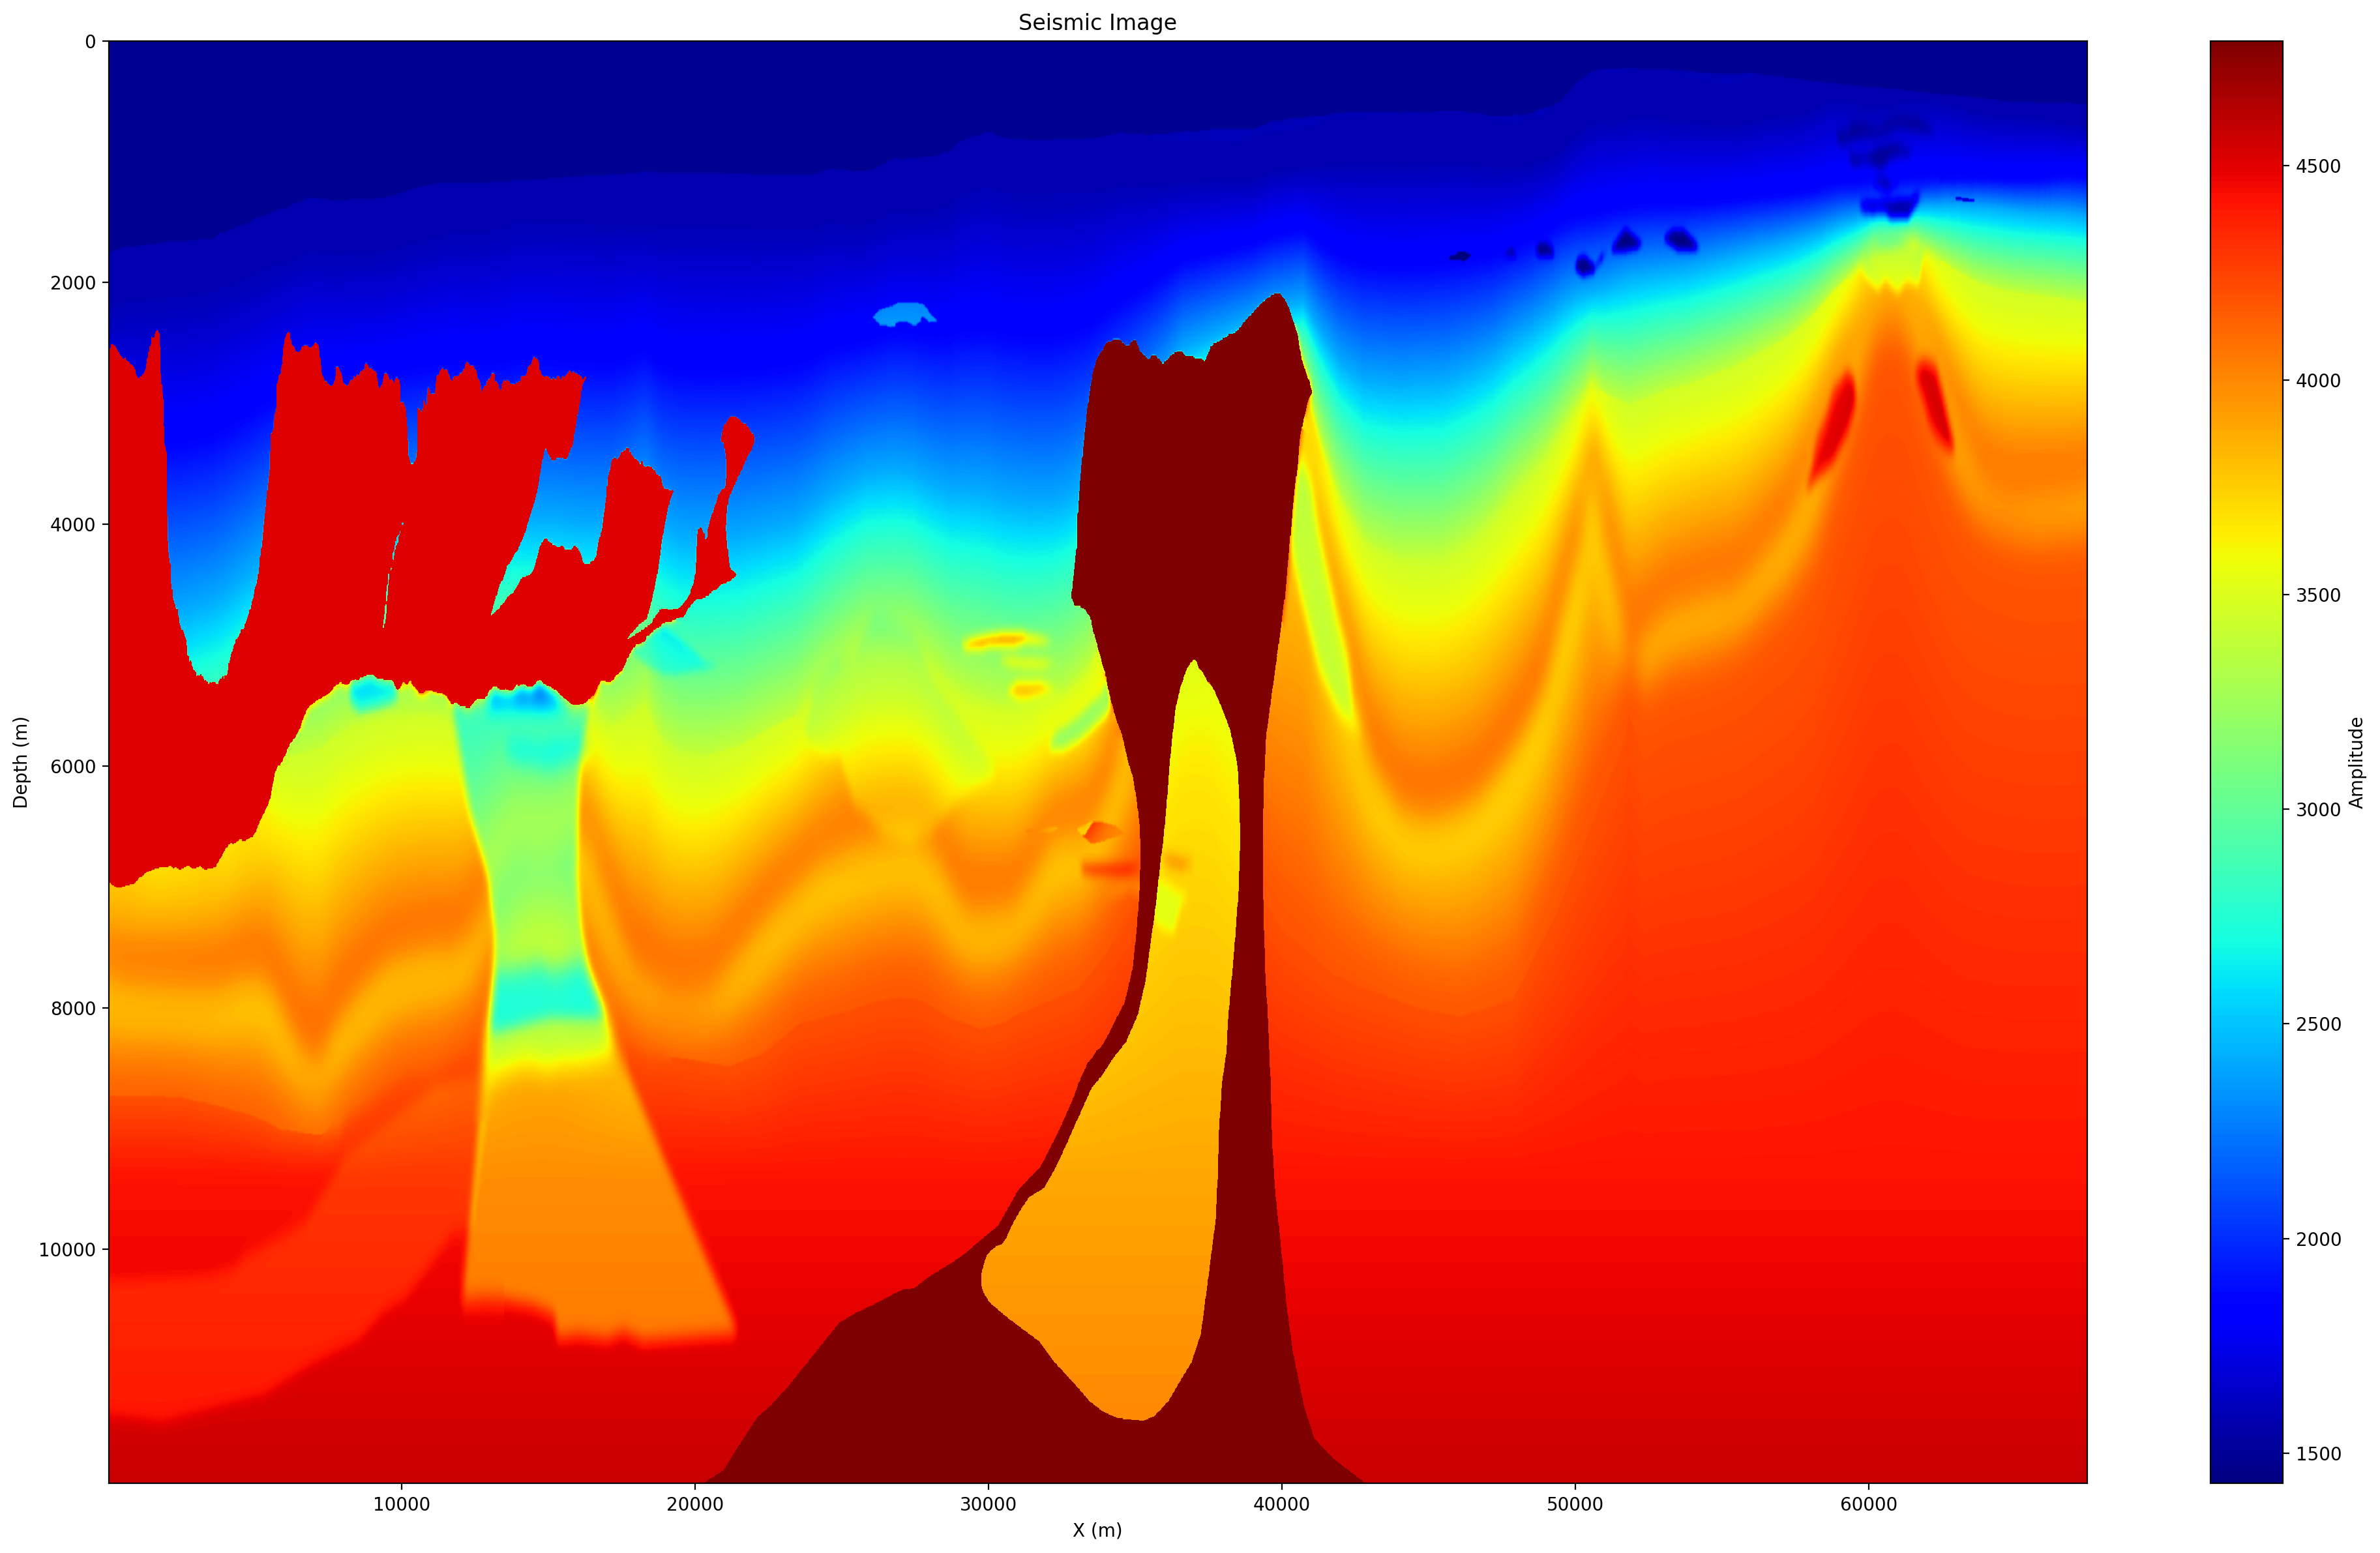

In [14]:
gisis.plot_seismic_image(context,
    xlabel="X (m)",
    ylabel="Depth (m)",
    y_spacing=6.25,
    x_header="GroupX",
    key_data='model',
    key_geometry="model geometry",
    figure_dims=(20,12),
    cmap='jet'
)

# 14. Plot The Acquisition
    Let's plot the acquisition but now adding the velocity model as boundary for the polygon


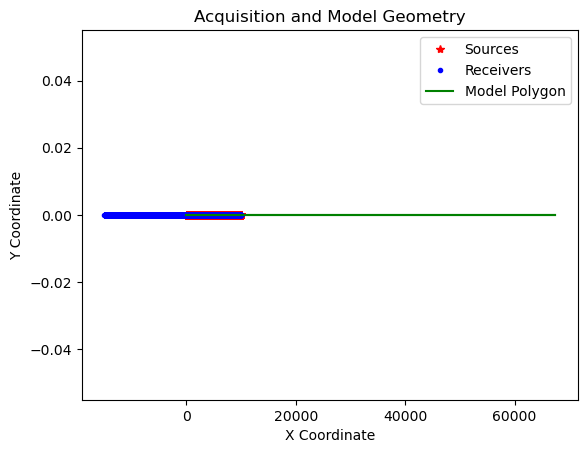

In [15]:
# gisis.plot_acquisition(context, key_acquisition_geometry='geometry', key_model_geometry='model geometry')

## 15. Convert Coordinates to a Local System
- Retrieve the model geometry DataFrame from the context.
- Define corner coordinates using the minimum and maximum values of `SourceX` and `SourceY`.
- Calculate the azimuth angle using the `calculate_azimuth` function.
- Convert the acquisition coordinates (e.g., `SourceX`, `SourceY`) to local coordinates using the `get_local_coordinates` function.
- Update the geometry DataFrame in the context with these local coordinates.

In [16]:
gisis.generate_local_coordinates(context, key_geometry='geometry',key_model_geometry='model geometry')

TRACE_SEQUENCE_LINE  TRACE_SEQUENCE_FILE  FieldRecord  TraceNumber  \
0                         1                    1            1            1   
1                         2                    2            1            2   
2                         3                    3            1            3   
3                         4                    4            1            4   
4                         5                    5            1            5   
...                     ...                  ...          ...          ...   
240195               240196               240196          200         1197   
240196               240197               240197          200         1198   
240197               240198               240198          200         1199   
240198               240199               240199          200         1200   
240199               240200               240200          200         1201   

        EnergySourcePoint  CDP  CDP_TRACE  TraceIdentificationCode  \
0                       0    0          1                        1   
1                       0    0          2                        1   
2                       0    0          3                        1   
3                       0    0          4                        1   
4                       0    0          5                        1   
...                   ...  ...        ...                      ...   
240195                  0    0       1197                        1   
240196                  0    0       1198                        1   
240197                  0    0       1199                        1   
240198                  0    0       1200                        1   
240199                  0    0       1201                        1   

        NSummedTraces  NStackedTraces  ...  TraceIdentifier  \
0                   0               0  ...                0   
1                   0               0  ...                0   
2                   0               0  ...                0   
3                   0               0  ...                0   
4                   0               0  ...                0   
...               ...             ...  ...              ...   
240195              0               0  ...                0   
240196              0               0  ...                0   
240197              0               0  ...                0   
240198              0               0  ...                0   
240199              0               0  ...                0   

        ScalarTraceHeader  SourceType  SourceEnergyDirectionMantissa  \
0                       0           0                              0   
1                       0           0                              0   
2                       0           0                              0   
3                       0           0                              0   
4                       0           0                              0   
...                   ...         ...                            ...   
240195                  0           0                              0   
240196                  0           0                              0   
240197                  0           0                              0   
240198                  0           0                              0   
240199                  0           0                              0   

        SourceEnergyDirectionExponent  SourceMeasurementMantissa  \
0                                   0                          0   
1                                   0                          0   
2                                   0                          0   
3                                   0                          0   
4                                   0                          0   
...                               ...                        ...   
240195                              0                          0   
240196                              0                          0

# 16. Plot The Acquisition
    Let's plot the acquisition but now with local geometry defined by velocity model


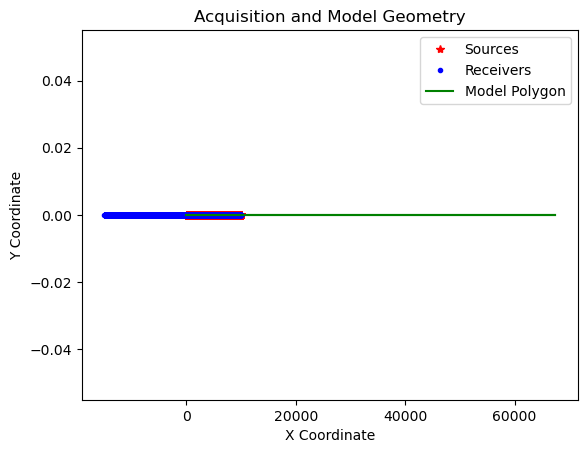

In [17]:
gisis.plot_acquisition(context, key_acquisition_geometry='geometry', key_model_geometry='model geometry')

# 17. Kill Traces Outside Model
    Since we have traces that are outside the model, which were modeled by extending the model to the left, we want to get rid of them and stay with only the traces that are inside

In [18]:
gisis.kill_traces_outside_box(context, key_geometry='geometry',key_data='data')

# 18. Plot Result Geometry
    Now let's plot it to see how our acquisition looks like


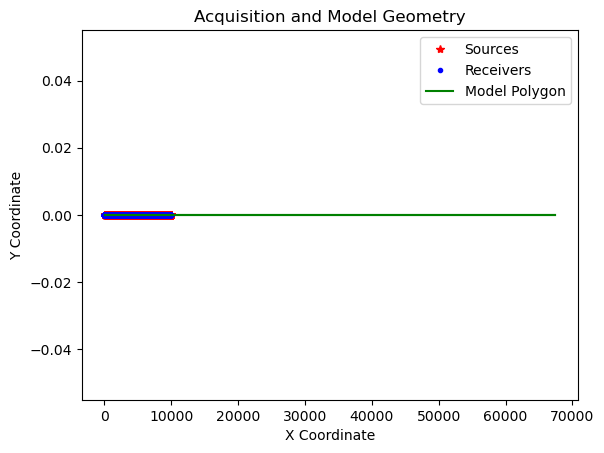

In [19]:
gisis.plot_acquisition(context, key_acquisition_geometry='geometry', key_model_geometry='model geometry')

## 19. Save Processed Geometry Data
- Define a function to store the geometry DataFrame as a Parquet file:
  - Validate that the context and the geometry DataFrame exist.
  - Check that the provided file path is valid and the destination directory exists.
  - Write the DataFrame to a Parquet file using the `to_parquet` method.

In [ ]:
gisis.store_geometry_as_parquet(context, file_path='SourceReceiverGeometry.parquet',key_geometry='geometry')
gisis.store_geometry_as_parquet(context, file_path='ModelGeometry.parquet',key_geometry='model geometry')

# 20. Writing Seismogram

In [ ]:
gisis.write_data(context,"./", "SeismogramKillTraces.npy", format='npy')